(app:period_of_pendulum)=
# Period of a Pendulum

Consider a mass particle of $m$ is suspended by a string of length $\ell$.  It is swinging in plane. In this case, the position of the particle can be determined by an angle $\theta$ of the string measured from the vertical line. At $t=0$, the particle is at the lowest position, $\theta=0$ and its kinetic energy is $E$.  The particle swings back and forth between $\theta=\theta_0$ and $\theta=-\theta_0$ where the highest position $\theta+_0$  is determined by the total energy of the system $E = m g \ell (1-\cos\theta_0)$ where $g$ is the acceleration due to the gravity.  The position of the particle is determined by the equation of motion 

$$
\ddot \theta = - \frac{g}{\ell} \sin \theta
$$

In common physics textbook, we solve this equation of motion using small amplitude approximation. If the energy is low enough, $|\theta| < \theta_0 \ll 1$.  Then, $\sin \theta \approx \theta$ is a good approximation and the equation of motion becomes

$$
\ddot \theta = - \frac{g}{\ell} \theta
$$(eq:eom-pendulum)

whose solution is $\theta(t) = \theta_0 \sin(\omega t)$ with angular frequency $\omega =  \sqrt{\frac{g}{\ell}}$, which is known as harmonic oscillation.  The period of the oscillation is $T_0 = \frac{2 \pi}{\omega} = 2 \pi \sqrt{\frac{\ell}{g}}$ which does not depend of $\theta_0$.

If the energy is higher, the small amplitude approximation fails and the solution to the equation of motion becomes very complicated and finding the period of oscillation in a simple closed form 
is difficult. We first attempt to find an analytical expression of the period as far as we can go.  When we are stuck, we resort to a numerical method.

Multiplying $\dot\theta$ to Eq. {eq}`eq:eom-pendulum` and integrating it over time, the left hand side becomes

$$
\int \ddot{\theta} \dot{\theta} dt = \frac{1}{2} \dot\theta^2 +const
$$

and the right hand side

$$
- \frac{g}{\ell} \int \sin \theta \dot\theta dt = \frac{g}{\ell} \cos\theta+ const
$$

where $const$ is a constant of integration which can be determine by the condition that $\theta = \pm \theta_0$  when $\dot\theta = 0$.   The equation of motion is now transformed to

$$
\frac{1}{2} \dot\theta^2 = \frac{g}{\ell} (\cos\theta - \cos\theta_0)
$$

from which we obtain

$$
dt = \sqrt{\frac{\ell}{2g}} \frac{d\theta}{\sqrt{\cos\theta - \cos\theta_0}}.
$$

Integrating it from $t=0$ to $t=T/4$ in the left hand side and correspondingly from $\theta=0$ to $\theta=\theta_0$) in the right hand side, we obtain

$$
\frac{T}{T_0}  = \frac{\sqrt{2}}{\pi} \int_0^{\theta_0} \frac{d\theta}{\sqrt{\cos\theta - \cos\theta_0}}
$$

where we normalize the period of the pendulum by the period of harmonic oscillator in order to hide parameters $g$ and $\ell$.  The integral in the right hand side can be expressed with the complete elliptic integral of the first kind as $\sqrt{2} K(\sin^2(\theta_0/2))$ and the closed form expression of the period is

$$
\frac{T}{T_0}  = \frac{2}{\pi} K(\sin^2(\theta_0/2)).
$$

This is an exact solution and useful for further analytical investigation.[^1]  However, if we want to know the actual value of the period, we still have to evaluate the elliptic function which is defined as an integral. We could use the numerical elliptic function in `scipy` but here we evaluate the above integral numerically.

The integral contains a singularity at $\theta=\theta_0$. To isolate the singularity, we write the integral of the right hand side as

$$
\int_0^{\theta_0} \frac{d\theta}{\sqrt{2 \sin\left(\frac{\theta_0 + \theta}{2}\right) \sin\left(\frac{\theta_0 - \theta}{2}\right)}}
$$

At $\theta=\theta_0$, the integrand becomes

$$
\frac{1}{\sqrt{\sin \theta_0}} \frac{1}{\sqrt{\theta_0-\theta}}
$$

Now, we have all information about the integral.  Use either Algorithm {ref}`integrable-singularity-1` or {ref}`integrable-singularity-2` with 

$$
F(\theta) = \frac{1}{\sqrt{\cos\theta - \cos\theta_0}}, \qquad A=\displaystyle\frac{1}{\sqrt{\sin\theta_0}}, \quad p=\displaystyle\frac{1}{2}
$$

Now we evaluate the integral for $0<\theta_0<\pi/2$ and plot the period as a function of $\theta_0$.  For small amplitude oscillation $\theta_0 \ll 1$, we expect $T/T_0 \approx 1$.
(When $\theta_0=0$, the pendulum is at rest and thus the period is infinity.)



[^1]: A mathematical analysis of pendulum based on the elliptical function is discussed in Ref. {cite}`Boas2006` (see Chapter 11 Section 12 in the book.)

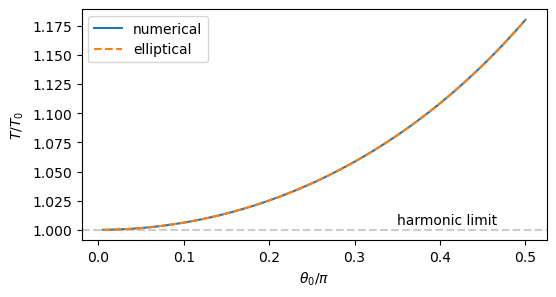

In [1]:
import numpy as np
from scipy.integrate import simpson

# complete elliptic integral of the first kind in scipy
from scipy.special import ellipk

# number of sampling for theta0
N=100

# samplig point of theta0. Avoid theta0=0!
theta0 = np.linspace(1,N,N)*np.pi/2/N

# number of sampling point in theta
M = 101
k=0

# period by numerical integration
T_num = np.zeros(N)

# period by elliptical function
T_ell = np.zeros(N)

for b in theta0:
    
    theta = np.linspace(0,1,M)*b
    theta[M-1]=0
    A = 1/np.sqrt(np.sin(b))
    f = 1/np.sqrt(np.cos(theta) - np.cos(b)) - A/np.sqrt(b-theta)
    f[M-1]=0
    theta[M-1]=b
    T_num[k] = (simpson(f,x=theta) + 2*A*np.sqrt(b)) * np.sqrt(2)/np.pi
    T_ell[k] = 2/np.pi * ellipk(np.sin(b/2)**2)
    k += 1

import matplotlib.pyplot as plt
plt.figure(figsize=(6,3))
plt.axhline(y = 1.0, color = '0.8', linestyle = '--')
plt.text(0.35,1.005,"harmonic limit")
plt.plot(theta0/np.pi,T_num,label="numerical")
plt.plot(theta0/np.pi,T_ell,'--',label="elliptical")
plt.xlabel(r"$\theta_0/\pi$")
plt.ylabel(r"$T/T_0$")
plt.legend(loc='best')
plt.show()

Unlike harmonic oscillator, the period of pendulum increases with the amplitude.  However, the increase is rather small.  Therefore, the harmonic approximation is not bad even for large amplitude. The result of the numerical integration agrees perfectly with the analytical result computed with the elliptic function in `scipy`.

In {numref}`Chapter %s <ch:ODE>`, the actual trajectory of a pendulum is numerically calculated, from which we can estimate the period of oscillation.


---
Last updated: {sub-ref}`today`